In [1]:
from agents import Consumer, Producer, Influencer
from content_market import ContentMarket
import numpy as np

In [2]:
num_producers = 5
num_influencers = 0
num_consumers = 5

topics = [[1, 10]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, num_producers, num_consumers, num_influencers)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
producer_colors = []
consumer_colors = []

for i in range(num_producers):
    #func = lambda x: exponential_decay(x, 1)
    # func = lambda x: 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    producer = Producer(i, content_market.sample_topic(), func)
    content_market.add_producer(producer)
    
    color = np.random.rand(3,)
    producer_colors.append(color)

for i in range(num_consumers):
    #func = lambda x: exponential_decay(x, 1)
    #func = lambda x : 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    consumer = Consumer(i, content_market.sample_topic(), func, 1, .1, 1)
    content_market.add_consumer(consumer)

    color = np.random.rand(3,)
    consumer_colors.append(color)

In [6]:
import matplotlib.pyplot as plt

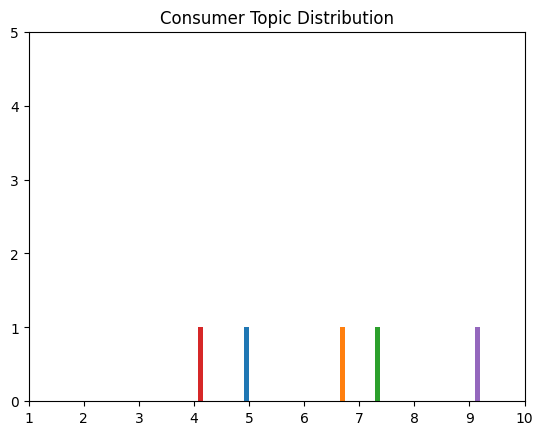

In [7]:
plt.figure()
plt.title("Consumer Topic Distribution")
plt.hist([c.main_interest for c in content_market.consumers])
plt.yticks(range(0, num_consumers + 1))
plt.xticks(range(1, 11))
plt.show()

In [8]:
consumer_stats, influencer_stats, producer_stats, total_stats, average_stats = content_market.optimize(1, 1, 100)

Iteration 0 / 100 done.
Total Social Welfare: 0.8204625415213003
Iteration 1 / 100 done.
Total Social Welfare: 1.4137119282566326
Consumer rate change: 0.0
Consumer utility change: 0.07692994015300308
Producer topic change: 0.49011623219334627
Producer utility change: 0.0695332286567723
Iteration 2 / 100 done.
Total Social Welfare: 1.2683654447724508
Consumer rate change: 0.0
Consumer utility change: 0.07634693710171167
Producer topic change: 0.24593068527648354
Producer utility change: 0.07879606734145889
Iteration 3 / 100 done.
Total Social Welfare: 1.9297639145743053
Consumer rate change: 0.0
Consumer utility change: 0.110534435763495
Producer topic change: 0.12352625894110458
Producer utility change: 0.03624209699479314
Iteration 4 / 100 done.
Total Social Welfare: 1.9678387932346049
Consumer rate change: 0.0
Consumer utility change: 0.0009591476810404953
Producer topic change: 0.06208178576261769
Producer utility change: 0.011093046751699032
Iteration 5 / 100 done.
Total Social We

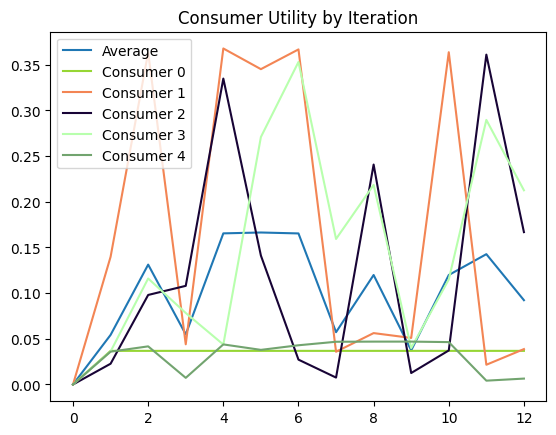

In [9]:
plt.figure()
plt.title("Consumer Utility by Iteration")
#plt.plot(total_stats['consumer_utilities'], label="Total")
plt.plot(average_stats['consumer_utilities'], label="Average")
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['utilities'], label="Consumer {}".format(consumer.index), color=consumer_colors[consumer.index])
plt.legend()
plt.show()

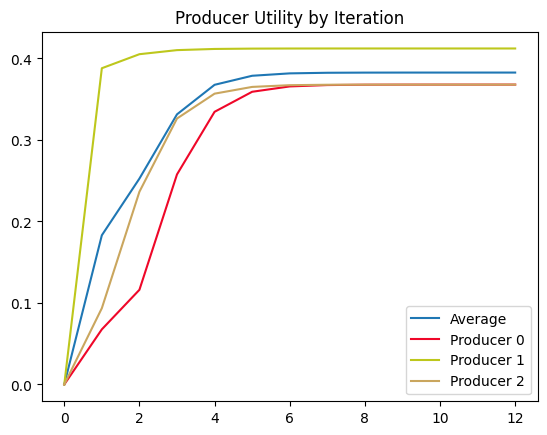

In [10]:
plt.figure()
plt.title("Producer Utility by Iteration")
#plt.plot(total_stats['producer_utilities'], label="Total")
plt.plot(average_stats['producer_utilities'], label="Average")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['utilities'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
plt.legend()
plt.show()

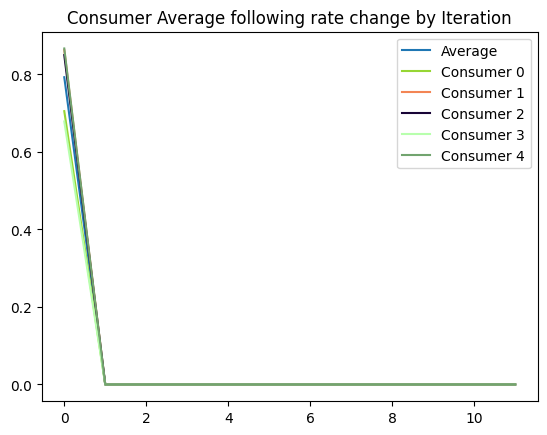

In [11]:
plt.figure()
plt.title("Consumer Average following rate change by Iteration")
plt.plot(average_stats['consumer_rate_change'], label='Average')
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['rate_change'], label='Consumer {}'.format(consumer.index), color=consumer_colors[consumer.index])
plt.legend()
plt.show()

In [12]:
consumer_stats

{0: {'following_rates': [array([0.22997198, 0.13175177, 0.16608538, 0.36796174]),
   array([0., 0., 0., 1.]),
   array([0., 0., 0., 1.]),
   array([0., 0., 0., 1.]),
   array([0., 0., 0., 1.]),
   array([0., 0., 0., 1.]),
   array([0., 0., 0., 1.]),
   array([0., 0., 0., 1.]),
   array([0., 0., 0., 1.]),
   array([0., 0., 0., 1.]),
   array([0., 0., 0., 1.]),
   array([0., 0., 0., 1.]),
   array([0., 0., 0., 1.])],
  'utilities': [0,
   0.036787944117144235,
   0.036787944117144235,
   0.036787944117144235,
   0.036787944117144235,
   0.036787944117144235,
   0.036787944117144235,
   0.036787944117144235,
   0.036787944117144235,
   0.036787944117144235,
   0.036787944117144235,
   0.036787944117144235,
   0.036787944117144235],
  'rate_change': [0.705196680191123,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]},
 1: {'following_rates': [array([0.21994156, 0.24950924, 0.24508203, 0.27053887]),
   array([2.49291423e-17, 1.00000000e+00, 0.00000000

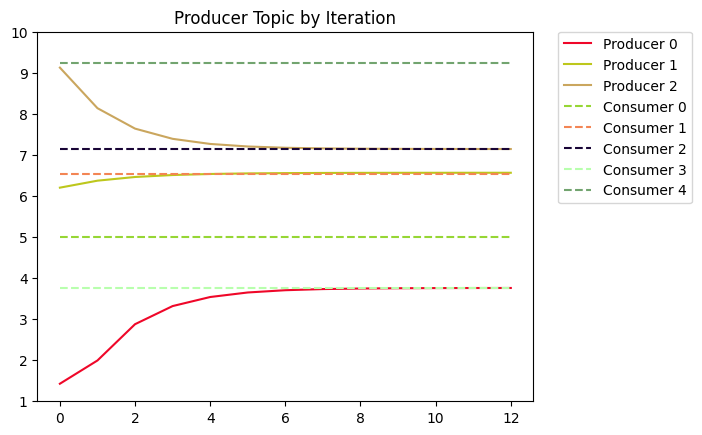

In [13]:
plt.figure()
plt.title("Producer Topic by Iteration")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topics'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
for consumer in content_market.consumers:
    plt.plot([consumer.main_interest] * len(producer_stats[producer.index]['topics']), label='Consumer {}'.format(consumer.index), linestyle='--', color=consumer_colors[consumer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(topics[0][0], topics[0][1])
plt.show()

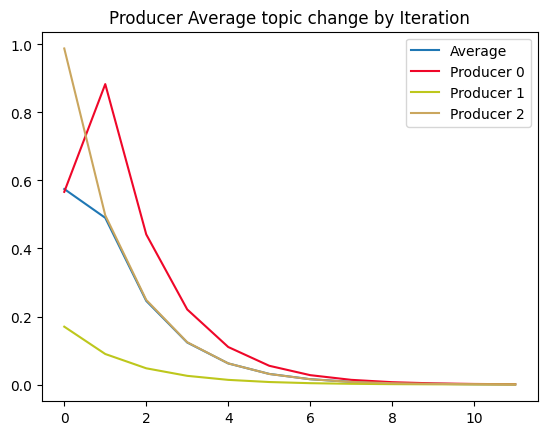

In [14]:
plt.figure()
plt.title("Producer Average topic change by Iteration")
plt.plot(average_stats['producer_topic_change'], label='Average')
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topic_change'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
plt.legend()
#plt.ylim(topics[0][0], topics[0][1])
plt.show()

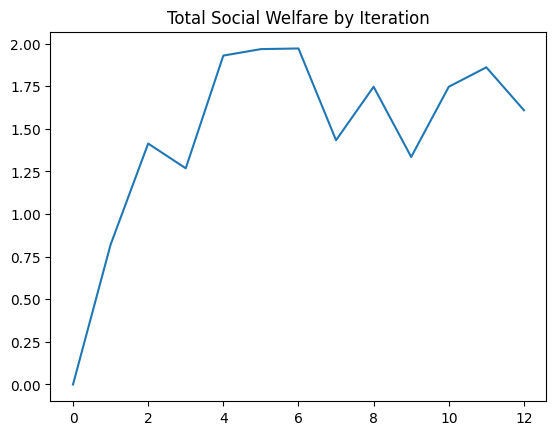

In [15]:
plt.figure()
plt.title("Total Social Welfare by Iteration")
plt.plot(total_stats['social_welfare'], label="Total")
plt.show()